### Project Title - Replace existing Sasol & other HP with  T36 HP and maintain all process and quality standard

### Problem satement 

In [1]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import CatBoostEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# Reading data collection file 

df = pd.read_excel(r'T36HP1.xlsx')
df.shape

(215, 31)

In [4]:
# checking first 5 rows of the dataframe.
pd.set_option('display.max_columns', None)
df.head()

,Date,Product,Ext Torque,Ext output,Chill roll temp,Bath temp,Ext vacuum,Line Speed,GV,2sigma,MD TENSILE STRENGTH,TD TENSILE STRENGTH,MD ELONGATION,TD ELONGATION,MD MODULUS OF ELASTICITY,TD MODULUS OF ELASTICITY,Seal Initiation Temp,HEAT SEAL STRENGTH,TD Break,T36 RM,RPG RM,Sasol HP RM,Melt Temp.,M.P Outlet Pr.,MD GAP 1,MD GAP 2,MD GAP 3,MD GAP 4,MD GAP 5,TD OS,TD DS
0,2021-06-15,SCL40-TI/A01,65.4,4371,28,28,150,240,1.92,2.302,1200,2690,170,29,17400,37000,107,356,1,30,20,50,249.7,35.3,1.02,1.13,4.13,1.06,0.99,35.0,31.3
1,2021-06-15,SCL40-TI/A01,72.2,4580,28,28,149,240,0.75,1.307,1420,1150,170,44,17300,27000,107,320,1,30,20,50,250.8,35.2,1.02,1.13,4.13,1.06,0.99,33.0,29.2
2,2021-06-15,SCL40-TI/A01,69.3,4594,28,28,145,248,1.79,1.310,1280,2950,220,50,13000,30700,106,366,0,30,20,50,249.7,36.6,1.02,1.13,4.13,1.06,0.99,32.3,28.2
3,2021-06-15,SCL40-TI/A01,68.7,4446,28,28,148,259,1.92,1.038,1310,2810,200,46,11800,30400,106,335,0,30,20,50,250.8,36.1,1.02,1.13,4.13,1.06,0.99,32.7,28.0
4,2021-06-15,SCL40-TI/A01,67.5,4626,28,28,150,264,1.70,0.917,1290,3060,230,58,13700,33300,106,354,0,30,20,50,250.8,34.7,1.02,1.13,4.13,1.06,0.99,33.2,28.9


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ext Torque,215.0,71.426512,4.188156e+00,62.200,67.700,70.600,75.1000,81.200
Ext output,215.0,4247.483721,4.372041e+02,3398.000,4060.000,4163.000,4662.5000,4928.000
Chill roll temp,215.0,30.669767,3.198681e+00,26.000,28.000,30.000,34.0000,35.000
Bath temp,215.0,30.860465,3.245280e+00,26.000,27.000,30.000,34.0000,36.000
Ext vacuum,215.0,123.088372,2.327380e+01,100.000,101.000,105.000,148.0000,151.000
Line Speed,215.0,396.106977,8.348441e+01,240.000,341.000,447.000,470.0000,472.000
GV,215.0,2.898563,1.469811e+00,0.660,1.710,3.050,3.7700,9.170
2sigma,215.0,0.926186,3.418159e-01,0.693,0.775,0.831,0.9455,3.718
MD TENSILE STRENGTH,215.0,1256.479070,1.019035e+02,838.000,1200.000,1260.000,1320.0000,1530.000
TD TENSILE STRENGTH,215.0,2952.674419,2.271212e+02,1150.000,2885.000,2980.000,3060.0000,3830.000


In [7]:
#Get 0 Standard Deviation fields. They are useless for our modeling
zero_std_cols = df.describe().T.iloc [  list(df.describe().T['std']<0.001) ].T.columns
df.drop(columns=zero_std_cols, inplace=True)

In [8]:
zero_std_cols

Index([], dtype='object')

In [9]:
df['TD Break'].value_counts()

0    188
1     23
2      2
3      2
Name: TD Break, dtype: int64

In [10]:
df['TD Break'] = df['TD Break'].apply(lambda x : 1 if x >= 1 else 0)

In [11]:
df['TD Break'].value_counts()

0    188
1     27
Name: TD Break, dtype: int64

In [12]:
#Clean Column Name
cols=[]
for col in df.columns:
    cols.append(col.replace(' ',''))
df.columns=cols

In [13]:
products = df['Product'].value_counts()
products

SCL20-TI/A01    74
SCL40-TI/A01    27
SZ18-TI/B01     26
SCL30-TI/A01    17
SAF30-TT/A11    14
SAF40-TT/A11    12
SCL18-TI/A01    11
SCL25-TI/A01     9
SAF35-TT/A11     8
SZ30-TI/A01      7
SCL40-TI/A04     6
SCL25-TI/T01     3
SZ30-TI/A01      1
Name: Product, dtype: int64

In [14]:
#list those columns which has more than 5 records
prods = list(products[products>5].index)
prods

['SCL20-TI/A01',
 'SCL40-TI/A01',
 'SZ18-TI/B01',
 'SCL30-TI/A01',
 'SAF30-TT/A11',
 'SAF40-TT/A11',
 'SCL18-TI/A01',
 'SCL25-TI/A01',
 'SAF35-TT/A11',
 'SZ30-TI/A01 ',
 'SCL40-TI/A04']

In [15]:
#keep only those records which has more than 5 records
df = df.loc[df['Product'].isin(prods)]  
df.shape 

(211, 28)

In [16]:
products = df['Product'].value_counts()
products

SCL20-TI/A01    74
SCL40-TI/A01    27
SZ18-TI/B01     26
SCL30-TI/A01    17
SAF30-TT/A11    14
SAF40-TT/A11    12
SCL18-TI/A01    11
SCL25-TI/A01     9
SAF35-TT/A11     8
SZ30-TI/A01      7
SCL40-TI/A04     6
Name: Product, dtype: int64

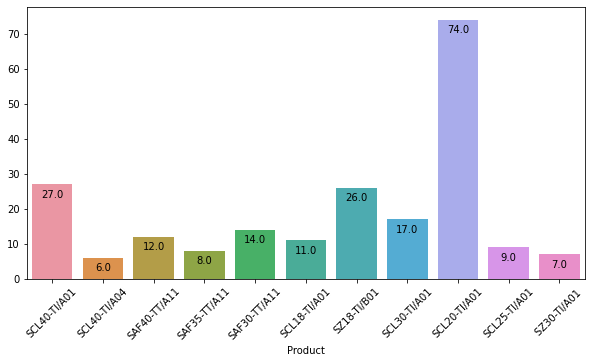

In [17]:
import seaborn as sns
plt.figure(figsize=(10,5))
ax =sns.barplot(x='Product', y=df.index, estimator=len, data=df )
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, -10), 
               textcoords = 'offset points')

plt.show()

#####  To understand the data we need Statistical summary

In [18]:
cols=df.select_dtypes(np.number).columns

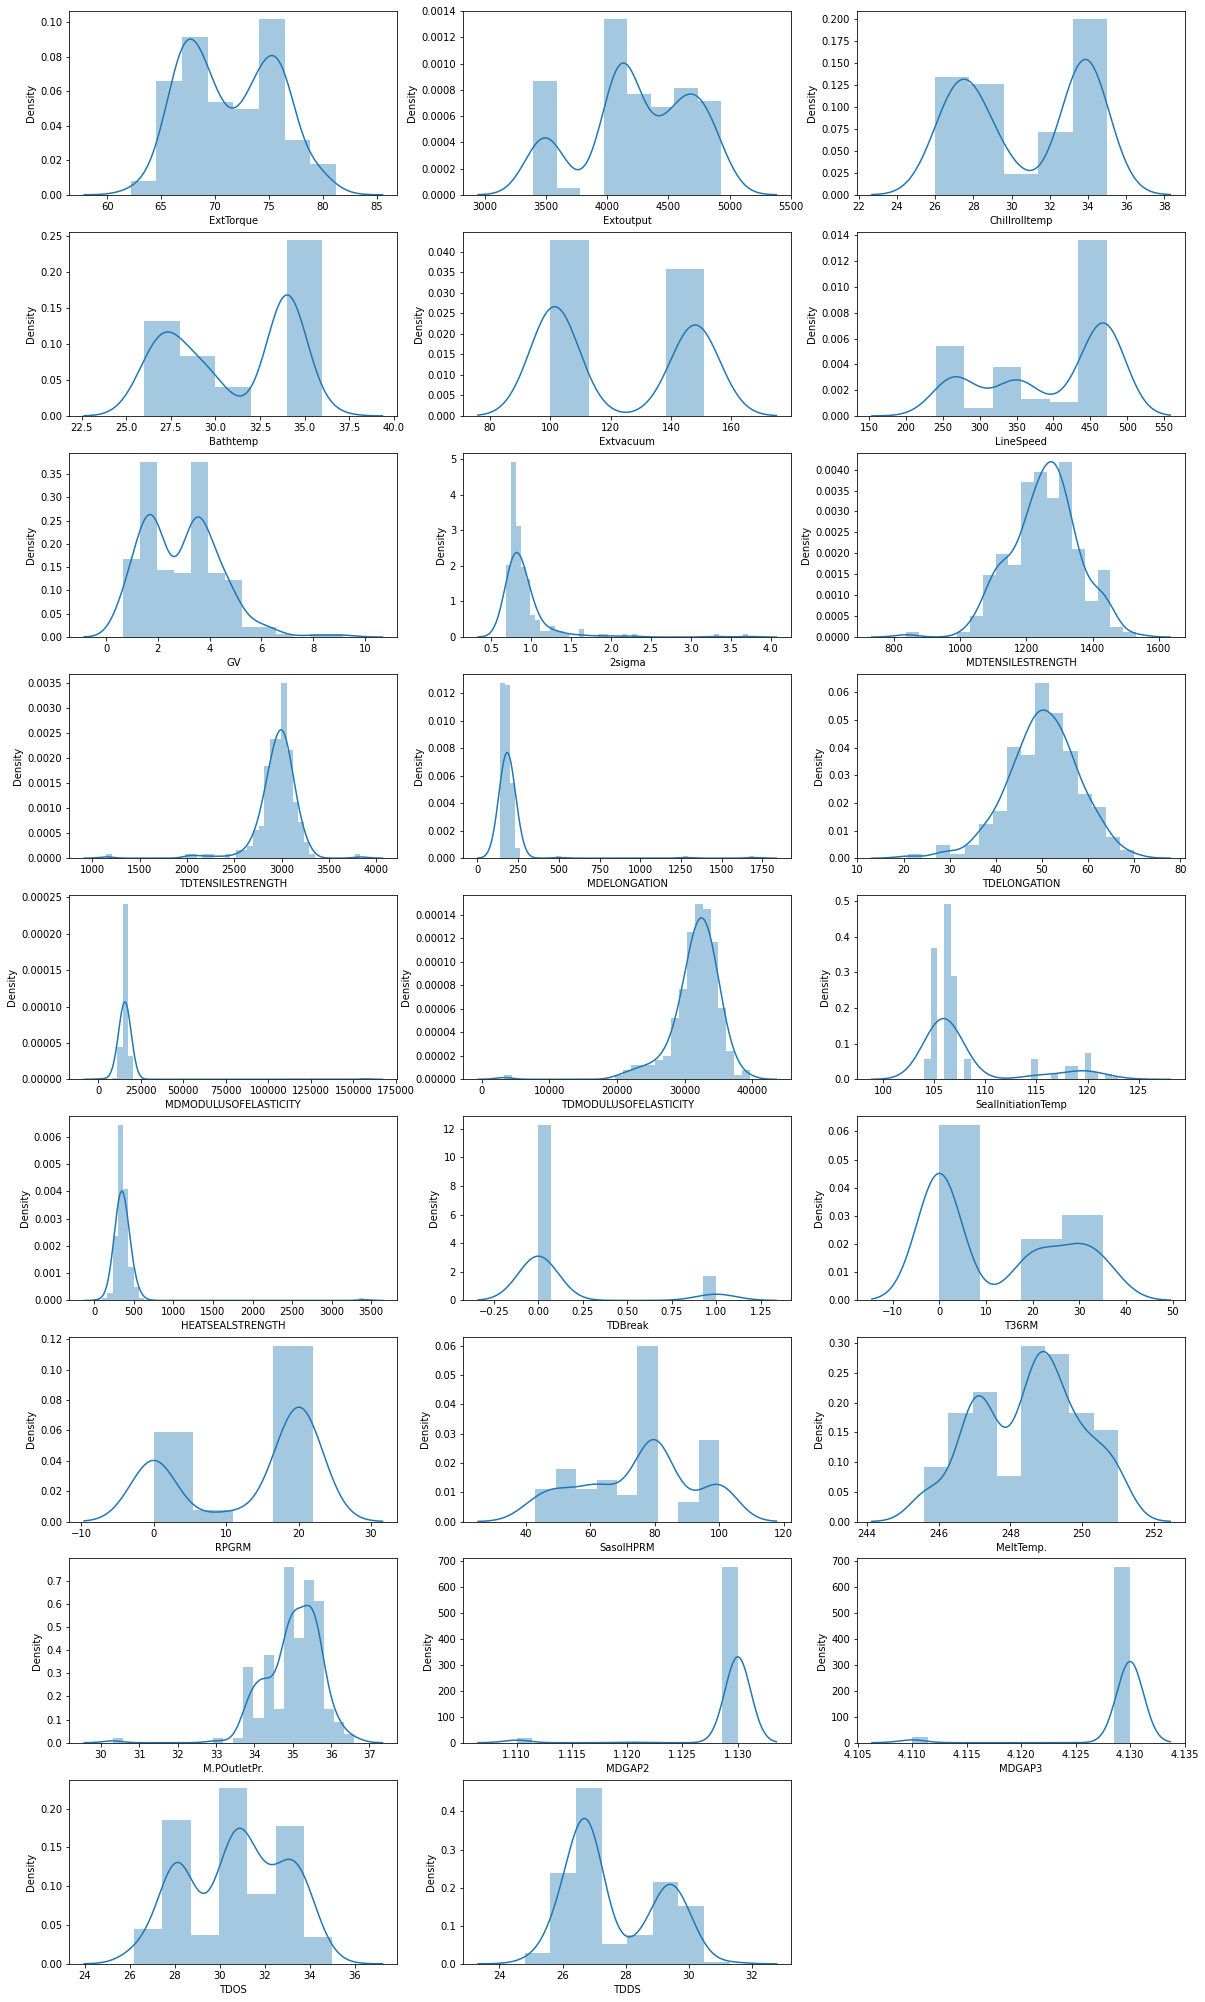

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
i=1
for col in  cols:
    plt.subplot(10,3,i)
    sns.distplot(df[col])
    i+=1

In [20]:
df.isna().sum()

Date                     0
Product                  0
ExtTorque                0
Extoutput                0
Chillrolltemp            0
Bathtemp                 0
Extvacuum                0
LineSpeed                0
GV                       0
2sigma                   0
MDTENSILESTRENGTH        0
TDTENSILESTRENGTH        0
MDELONGATION             0
TDELONGATION             0
MDMODULUSOFELASTICITY    0
TDMODULUSOFELASTICITY    0
SealInitiationTemp       0
HEATSEALSTRENGTH         0
TDBreak                  0
T36RM                    0
RPGRM                    0
SasolHPRM                0
MeltTemp.                0
M.POutletPr.             0
MDGAP2                   0
MDGAP3                   0
TDOS                     0
TDDS                     0
dtype: int64

In [21]:
enc_prod = pd.DataFrame( pd.get_dummies(df.Product), index=df.index)

In [22]:
enc_prod.shape

(211, 11)

In [23]:
enc_prod

,SAF30-TT/A11,SAF35-TT/A11,SAF40-TT/A11,SCL18-TI/A01,SCL20-TI/A01,SCL25-TI/A01,SCL30-TI/A01,SCL40-TI/A01,SCL40-TI/A04,SZ18-TI/B01,SZ30-TI/A01
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
210,0,0,0,0,0,0,0,0,0,1,0
211,0,0,0,0,0,0,0,0,0,1,0
212,0,0,0,0,0,0,0,0,0,1,0
213,0,0,0,0,0,0,0,0,0,1,0


In [24]:
df.shape

(211, 28)

In [25]:
df.columns

Index(['Date', 'Product', 'ExtTorque', 'Extoutput', 'Chillrolltemp',
       'Bathtemp', 'Extvacuum', 'LineSpeed', 'GV', '2sigma',
       'MDTENSILESTRENGTH', 'TDTENSILESTRENGTH', 'MDELONGATION',
       'TDELONGATION', 'MDMODULUSOFELASTICITY', 'TDMODULUSOFELASTICITY',
       'SealInitiationTemp', 'HEATSEALSTRENGTH', 'TDBreak', 'T36RM', 'RPGRM',
       'SasolHPRM', 'MeltTemp.', 'M.POutletPr.', 'MDGAP2', 'MDGAP3', 'TDOS',
       'TDDS'],
      dtype='object')

In [26]:
df1 = df.merge(enc_prod, how='left',left_index=True, right_index=True)

In [27]:
df1

,Date,Product,ExtTorque,Extoutput,Chillrolltemp,Bathtemp,Extvacuum,LineSpeed,GV,2sigma,MDTENSILESTRENGTH,TDTENSILESTRENGTH,MDELONGATION,TDELONGATION,MDMODULUSOFELASTICITY,TDMODULUSOFELASTICITY,SealInitiationTemp,HEATSEALSTRENGTH,TDBreak,T36RM,RPGRM,SasolHPRM,MeltTemp.,M.POutletPr.,MDGAP2,MDGAP3,TDOS,TDDS,SAF30-TT/A11,SAF35-TT/A11,SAF40-TT/A11,SCL18-TI/A01,SCL20-TI/A01,SCL25-TI/A01,SCL30-TI/A01,SCL40-TI/A01,SCL40-TI/A04,SZ18-TI/B01,SZ30-TI/A01
0,2021-06-15,SCL40-TI/A01,65.4,4371,28,28,150,240,1.92,2.302,1200,2690,170,29,17400,37000,107,356,1,30,20,50,249.7,35.3,1.13,4.13,35.0,31.3,0,0,0,0,0,0,0,1,0,0,0
1,2021-06-15,SCL40-TI/A01,72.2,4580,28,28,149,240,0.75,1.307,1420,1150,170,44,17300,27000,107,320,1,30,20,50,250.8,35.2,1.13,4.13,33.0,29.2,0,0,0,0,0,0,0,1,0,0,0
2,2021-06-15,SCL40-TI/A01,69.3,4594,28,28,145,248,1.79,1.310,1280,2950,220,50,13000,30700,106,366,0,30,20,50,249.7,36.6,1.13,4.13,32.3,28.2,0,0,0,0,0,0,0,1,0,0,0
3,2021-06-15,SCL40-TI/A01,68.7,4446,28,28,148,259,1.92,1.038,1310,2810,200,46,11800,30400,106,335,0,30,20,50,250.8,36.1,1.13,4.13,32.7,28.0,0,0,0,0,0,0,0,1,0,0,0
4,2021-06-15,SCL40-TI/A01,67.5,4626,28,28,150,264,1.70,0.917,1290,3060,230,58,13700,33300,106,354,0,30,20,50,250.8,34.7,1.13,4.13,33.2,28.9,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2021-08-22,SZ18-TI/B01,75.8,3490,34,34,102,470,4.67,0.984,1260,3000,180,61,14300,28900,106,333,0,0,0,100,249.2,34.3,1.13,4.13,31.2,26.5,0,0,0,0,0,0,0,0,0,1,0
211,2021-08-22,SZ18-TI/B01,79.4,3485,34,34,104,470,4.61,0.965,1240,2890,170,58,13800,29900,106,269,0,0,0,100,249.5,34.9,1.13,4.13,30.8,26.6,0,0,0,0,0,0,0,0,0,1,0
212,2021-08-22,SZ18-TI/B01,73.2,3465,34,34,103,470,4.39,0.947,1210,2840,170,49,12900,28800,106,368,0,0,0,100,249.1,35.6,1.13,4.13,31.5,26.8,0,0,0,0,0,0,0,0,0,1,0
213,2021-08-23,SZ18-TI/B01,79.4,3485,34,34,103,470,4.39,0.969,1190,2980,160,58,14400,29900,106,394,0,0,0,100,248.5,35.1,1.13,4.13,31.2,26.5,0,0,0,0,0,0,0,0,0,1,0


In [28]:
df1.drop(columns='Product',inplace=True,axis=0)
df1.shape

(211, 38)

In [29]:
df1.columns

Index(['Date', 'ExtTorque', 'Extoutput', 'Chillrolltemp', 'Bathtemp',
       'Extvacuum', 'LineSpeed', 'GV', '2sigma', 'MDTENSILESTRENGTH',
       'TDTENSILESTRENGTH', 'MDELONGATION', 'TDELONGATION',
       'MDMODULUSOFELASTICITY', 'TDMODULUSOFELASTICITY', 'SealInitiationTemp',
       'HEATSEALSTRENGTH', 'TDBreak', 'T36RM', 'RPGRM', 'SasolHPRM',
       'MeltTemp.', 'M.POutletPr.', 'MDGAP2', 'MDGAP3', 'TDOS', 'TDDS',
       'SAF30-TT/A11', 'SAF35-TT/A11', 'SAF40-TT/A11', 'SCL18-TI/A01',
       'SCL20-TI/A01', 'SCL25-TI/A01', 'SCL30-TI/A01', 'SCL40-TI/A01',
       'SCL40-TI/A04', 'SZ18-TI/B01', 'SZ30-TI/A01 '],
      dtype='object')

In [30]:
cols = df1.columns
print(cols)

cols_scale = cols.drop('TDBreak')
cols_scale = cols_scale.drop('2sigma')
cols_scale = cols_scale.drop('Date')
print(cols_scale)

Index(['Date', 'ExtTorque', 'Extoutput', 'Chillrolltemp', 'Bathtemp',
       'Extvacuum', 'LineSpeed', 'GV', '2sigma', 'MDTENSILESTRENGTH',
       'TDTENSILESTRENGTH', 'MDELONGATION', 'TDELONGATION',
       'MDMODULUSOFELASTICITY', 'TDMODULUSOFELASTICITY', 'SealInitiationTemp',
       'HEATSEALSTRENGTH', 'TDBreak', 'T36RM', 'RPGRM', 'SasolHPRM',
       'MeltTemp.', 'M.POutletPr.', 'MDGAP2', 'MDGAP3', 'TDOS', 'TDDS',
       'SAF30-TT/A11', 'SAF35-TT/A11', 'SAF40-TT/A11', 'SCL18-TI/A01',
       'SCL20-TI/A01', 'SCL25-TI/A01', 'SCL30-TI/A01', 'SCL40-TI/A01',
       'SCL40-TI/A04', 'SZ18-TI/B01', 'SZ30-TI/A01 '],
      dtype='object')
Index(['ExtTorque', 'Extoutput', 'Chillrolltemp', 'Bathtemp', 'Extvacuum',
       'LineSpeed', 'GV', 'MDTENSILESTRENGTH', 'TDTENSILESTRENGTH',
       'MDELONGATION', 'TDELONGATION', 'MDMODULUSOFELASTICITY',
       'TDMODULUSOFELASTICITY', 'SealInitiationTemp', 'HEATSEALSTRENGTH',
       'T36RM', 'RPGRM', 'SasolHPRM', 'MeltTemp.', 'M.POutletPr.', 'MDGAP2',
   

In [31]:
#Remove Taget Variable
target = df1[['TDBreak']]



#Scale Variable
scaler = StandardScaler()
scaled = scaler.fit_transform(df1[cols_scale])

In [32]:
df1.isna().sum()

Date                     0
ExtTorque                0
Extoutput                0
Chillrolltemp            0
Bathtemp                 0
Extvacuum                0
LineSpeed                0
GV                       0
2sigma                   0
MDTENSILESTRENGTH        0
TDTENSILESTRENGTH        0
MDELONGATION             0
TDELONGATION             0
MDMODULUSOFELASTICITY    0
TDMODULUSOFELASTICITY    0
SealInitiationTemp       0
HEATSEALSTRENGTH         0
TDBreak                  0
T36RM                    0
RPGRM                    0
SasolHPRM                0
MeltTemp.                0
M.POutletPr.             0
MDGAP2                   0
MDGAP3                   0
TDOS                     0
TDDS                     0
SAF30-TT/A11             0
SAF35-TT/A11             0
SAF40-TT/A11             0
SCL18-TI/A01             0
SCL20-TI/A01             0
SCL25-TI/A01             0
SCL30-TI/A01             0
SCL40-TI/A01             0
SCL40-TI/A04             0
SZ18-TI/B01              0
S

<AxesSubplot:>

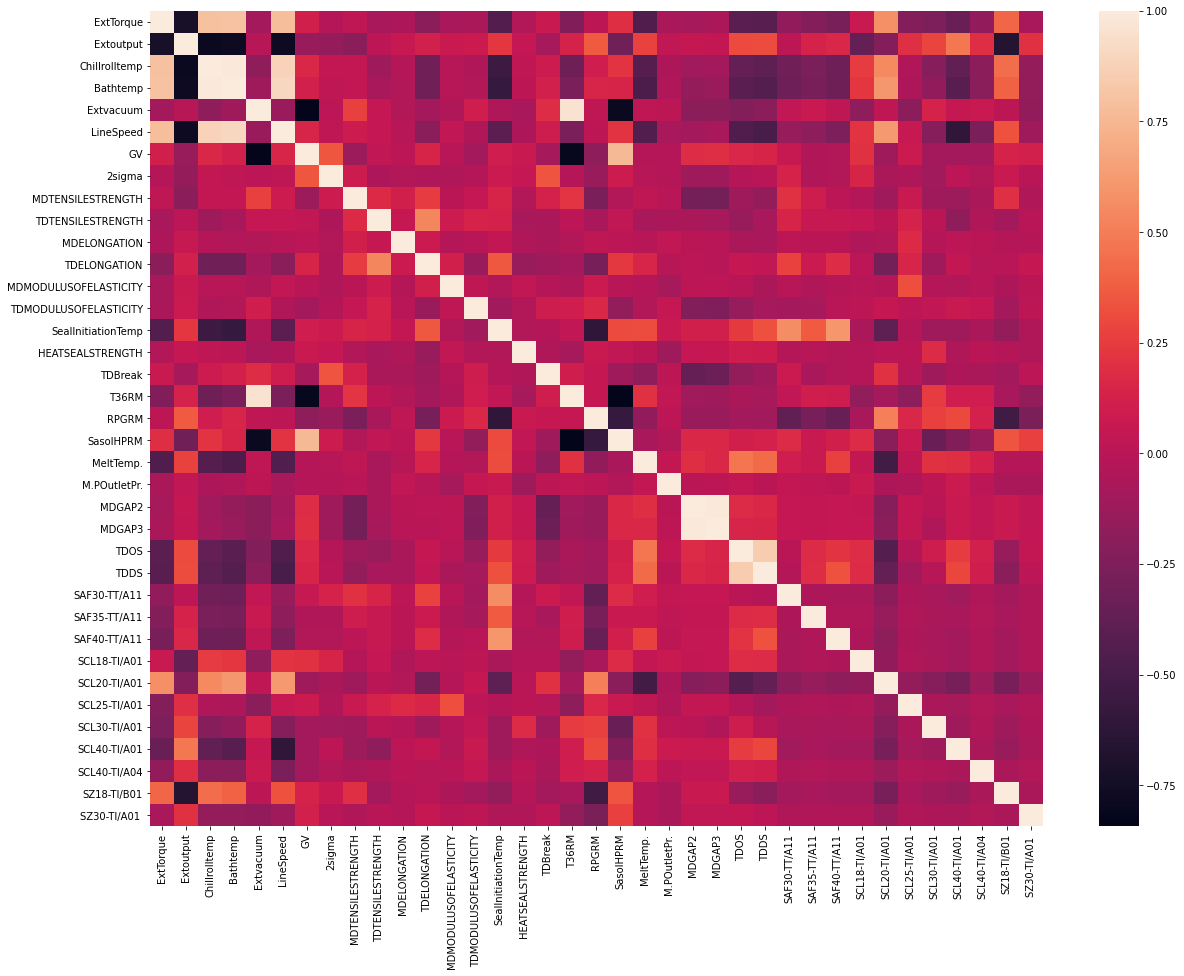

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr())

In [34]:
#plt.figure(figsize=(20,15))
#sns.heatmap(df.corr())
cor = df1.corr()[['TDBreak','2sigma']]
print(cor.sort_values('TDBreak')['TDBreak'].head(3))
print ('\n')
print(cor.sort_values('TDBreak')['TDBreak'].tail(3))

print ('\n')
print(cor.sort_values('2sigma')['2sigma'].head(3))
print ('\n')
print(cor.sort_values('2sigma')['2sigma'].tail(3)[0:2])

MDGAP2      -0.357562
MDGAP3      -0.333102
MeltTemp.   -0.173726
Name: TDBreak, dtype: float64


SCL20-TI/A01    0.207930
2sigma          0.341616
TDBreak         1.000000
Name: TDBreak, dtype: float64


Extoutput   -0.156115
RPGRM       -0.131717
MDGAP2      -0.115853
Name: 2sigma, dtype: float64


TDBreak    0.341616
GV         0.346133
Name: 2sigma, dtype: float64


In [35]:
# As high correlatuon variables with 2sigma and TDBreak are not there in independent variables, linear models may not work for prediction

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score

cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [37]:
X = df1.drop(columns= ['Date','TDBreak'] )
y = df1['TDBreak']

In [40]:

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), SVC()]
names = ['Logistic Regression',"Naive Bayes", "Decision Tree", "SVM"]

def getScores(estimator, X, y):
    yPred = estimator.predict(X)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=3, average='macro'), 
            recall_score(y, yPred, pos_label=3, average='macro'))

def my_scorer(estimator, X, y):
    a, p, r = getScores(estimator, X, y)
    a,p,r = round(a,2), round(p,2), round(r,2)   
    print ("Acc:",a, "Precision:",p,"Recall:", r)
    model_score.append(a,p,r)
    return 1


for model, name in zip(models, names):
    print (name)
    start = time.time()
    cross_val_score(model, X, y,scoring=my_scorer, cv=cv)
    print ('time', time.time() - start, '\n\n')

Logistic Regression
Acc: 0.86 Precision: 0.43 Recall: 0.5
Acc: 0.86 Precision: 0.43 Recall: 0.5
Acc: 0.86 Precision: 0.43 Recall: 0.5
Acc: 0.86 Precision: 0.43 Recall: 0.5
Acc: 0.86 Precision: 0.43 Recall: 0.5
Acc: 0.86 Precision: 0.43 Recall: 0.5
Acc: 0.9 Precision: 0.45 Recall: 0.5
Acc: 0.9 Precision: 0.45 Recall: 0.5
Acc: 0.9 Precision: 0.45 Recall: 0.5
Acc: 0.9 Precision: 0.45 Recall: 0.5
time 0.3626890182495117 


Naive Bayes
Acc: 0.77 Precision: 0.64 Recall: 0.73
Acc: 0.76 Precision: 0.63 Recall: 0.72
Acc: 0.67 Precision: 0.59 Recall: 0.67
Acc: 0.57 Precision: 0.55 Recall: 0.61
Acc: 0.48 Precision: 0.46 Recall: 0.42
Acc: 0.62 Precision: 0.5 Recall: 0.5
Acc: 0.71 Precision: 0.55 Recall: 0.62
Acc: 0.67 Precision: 0.61 Recall: 0.82
Acc: 0.67 Precision: 0.54 Recall: 0.59
Acc: 0.71 Precision: 0.55 Recall: 0.62
time 0.11447000503540039 


Decision Tree
Acc: 0.73 Precision: 0.54 Recall: 0.56
Acc: 0.81 Precision: 0.42 Recall: 0.47
Acc: 0.71 Precision: 0.42 Recall: 0.42
Acc: 0.76 Precisio

In [41]:
#Recall     : when process fails, 92% identified by the model. 8% even when process fail not identified.
#Precision  : when process fails, 64% identified by the model. 36% even when normal process is said failed process.

In [43]:
#Train Test split to Develop final model
X_test,  X_train, y_test, y_train = train_test_split(X,y,test_size=.8, stratify=y )

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((169, 36), (169,), (42, 36), (42,))

In [47]:
def get_metrics(y, y_pred):
    acc = round(accuracy_score(y, y_pred),2)
    recall = round(recall_score(y, y_pred),2)
    precision = round(precision_score(y, y_pred),2)
    f1 = round(f1_score(y,y_pred),2)
    roc = round(roc_auc_score(y,y_pred),2)
    print ("Accuracy :", acc, "Recall", recall, "Precision:",precision, "F1 Score:",f1, "ROC:", roc)

In [49]:
def create_model(model):
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print ("On Train Data")
    get_metrics(y_train,y_train_pred)
    print ("On Test Data")
    get_metrics(y_test,y_test_pred)
    return model

In [50]:
from sklearn.inspection import permutation_importance
model = GaussianNB()
model = create_model(model)

imps = permutation_importance(model, X_test, y_test)

On Train Data
Accuracy : 0.67 Recall 0.9 Precision: 0.26 F1 Score: 0.41 ROC: 0.77
On Test Data
Accuracy : 0.48 Recall 0.8 Precision: 0.16 F1 Score: 0.27 ROC: 0.62


In [51]:
features = pd.DataFrame( {"Feature":X.columns, "Important":imps['importances_mean']})
features.sort_values("Important", ascending=False).head(5)

,Feature,Important
7,2sigma,0.047619
0,ExtTorque,0.038095
4,Extvacuum,0.033333
23,TDOS,0.033333
16,T36RM,0.033333


In [52]:
model = LogisticRegression()
model = create_model(model)

On Train Data
Accuracy : 0.89 Recall 0.1 Precision: 1.0 F1 Score: 0.17 ROC: 0.55
On Test Data
Accuracy : 0.88 Recall 0.0 Precision: 0.0 F1 Score: 0.0 ROC: 0.5


In [53]:
features = pd.DataFrame( {"Feature":X.columns, "Important":model.coef_[0]})
features.sort_values("Important", ascending=False).head(5)

,Feature,Important
4,Extvacuum,0.017404
5,LineSpeed,0.006549
8,MDTENSILESTRENGTH,0.006062
16,T36RM,0.004849
17,RPGRM,0.002008


In [54]:
model = XGBClassifier(objective='binary:logistic')
model = create_model(model)

[19:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
On Train Data
Accuracy : 1.0 Recall 1.0 Precision: 1.0 F1 Score: 1.0 ROC: 1.0
On Test Data
Accuracy : 0.88 Recall 0.6 Precision: 0.5 F1 Score: 0.55 ROC: 0.76


In [55]:
features = pd.DataFrame( {"Feature":X.columns, "Important":model.feature_importances_})
features.sort_values("Important", ascending=False).head(5)

,Feature,Important
21,MDGAP2,0.145761
18,SasolHPRM,0.106956
2,Chillrolltemp,0.103145
7,2sigma,0.064931
19,MeltTemp.,0.057357


In [61]:
# doing oversampling to convert imbalanced data to balanced data

from imblearn.combine import SMOTETomek

smk = SMOTETomek()
x_os, y_os = smk.fit_resample(X,y)

In [62]:
len(x_os), len(y_os)

(352, 352)

In [64]:
len(y_os), sum(y_os) # 176 Yes and 176 no in the data received after oversampling

(352, 176)

In [65]:
# splitting the over

x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_os, y_os, random_state=1, test_size=0.3)

In [68]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

class_models = {'logistic_regression' : LogisticRegression(), 'Decision_tree' : DecisionTreeClassifier(), 'Random_forest' : RandomForestClassifier(), 'svc':SVC(), 'naive_bayes':GaussianNB(), 'xgboost':XGBClassifier(), 'adaboost':AdaBoostClassifier()}
score_dict = {'model':[], 'accuracy':[], 'precision':[], 'recall':[], 'f1_score':[]}

In [69]:
for i in class_models:
    class_model = class_models[i]
    class_model.fit(x_train_os, y_train_os)
    y_pred = class_model.predict(x_test_os)
    a = accuracy_score(y_test_os, y_pred)
    p = precision_score(y_test_os, y_pred)
    r = recall_score(y_test_os, y_pred)
    f = f1_score(y_test_os, y_pred)
    score_dict['model'].append(i)
    score_dict['accuracy'].append(a)
    score_dict['precision'].append(p)
    score_dict['recall'].append(r)
    score_dict['f1_score'].append(f)

[19:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
pd.DataFrame(score_dict)

,model,accuracy,precision,recall,f1_score
0,logistic_regression,0.754717,0.826087,0.678571,0.745098
1,Decision_tree,0.886792,0.879310,0.910714,0.894737
2,Random_forest,0.933962,0.945455,0.928571,0.936937
3,svc,0.632075,0.688889,0.553571,0.613861
4,naive_bayes,0.801887,0.761194,0.910714,0.829268
5,xgboost,0.924528,0.928571,0.928571,0.928571
6,adaboost,0.915094,0.927273,0.910714,0.918919


In [73]:
from sklearn.feature_selection import RFE

rfe1 = RFE(estimator=XGBClassifier(), n_features_to_select=5).fit(x_train_os, y_train_os)

[19:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [75]:
# deriving important column names using rfe1

from itertools import compress
imp_columns_tdbreak = list(compress(X, list(rfe1.support_)))
imp_columns_tdbreak

['LineSpeed', '2sigma', 'MDELONGATION', 'RPGRM', 'MDGAP2']

In [78]:
x2 = df1.drop(columns= ['Date','2sigma'] )
y2 = df1['2sigma']

In [79]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=1, test_size=0.3)

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

reg_models = {'linear_regression' : LinearRegression(), 'Decision_tree' : DecisionTreeRegressor(random_state=1), 'Random_forest' : RandomForestRegressor(random_state=1)}

r2_dict = {'model':[], 'r2':[], 'mae':[], 'rmse':[]}

In [82]:
for i in reg_models:
    reg_model = reg_models[i]
    reg_model.fit(x2_train, y2_train)
    y2_pred = reg_model.predict(x2_test)
    r2 = r2_score(y2_test, y2_pred)
    r2 = round(r2, 2)
    mae = mean_absolute_error(y2_test, y2_pred)
    mae = round(mae,2)
    rmse = (mean_squared_error(y2_test, y2_pred))**0.5
    rmse = round(rmse,2)
    r2_dict['model'].append(i)
    r2_dict['r2'].append(r2)
    r2_dict['mae'].append(mae)
    r2_dict['rmse'].append(rmse)

In [83]:
pd.DataFrame(r2_dict)

,model,r2,mae,rmse
0,linear_regression,0.34,0.22,0.30
1,Decision_tree,0.61,0.14,0.23
2,Random_forest,0.71,0.12,0.20


In [86]:
rfe_2sigma = RFE(estimator=RandomForestRegressor(random_state=1), n_features_to_select=5).fit(x2_train, y2_train)

In [88]:
# deriving important column names using rfe_2sigma

from itertools import compress
imp_columns_2sigma = list(compress(x2, list(rfe_2sigma.support_)))
imp_columns_2sigma

['LineSpeed', 'GV', 'TDMODULUSOFELASTICITY', 'TDOS', 'TDDS']